In [55]:
import pandas as pd
import pandas_datareader.data as web
import yfinance as yf
import datetime


yf.pdr_override()
start = datetime.datetime(2012, 1, 1)
end = datetime.datetime.today()

data_dict = {}
stocks = ['AAPL', 'GOOGL', 'MSFT', 'AMZN', 'F', 'TSLA', 'NFLX', 'NVDA', 'IBM']
for key in stocks:
    data_dict[key] = web.get_data_yahoo(key, start, end)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [56]:
import sys
sys.path.insert(1, '../')
import stats

In [57]:
data_dict['F']

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,11.00,11.25,10.990,11.13,6.406258,45709900
2012-01-04,11.15,11.53,11.070,11.30,6.504105,79725200
2012-01-05,11.33,11.63,11.240,11.59,6.671024,67877500
2012-01-06,11.74,11.80,11.520,11.71,6.740097,59840700
2012-01-09,11.83,11.95,11.700,11.80,6.791901,53981500
...,...,...,...,...,...,...
2024-03-05,12.65,12.74,12.500,12.58,12.580000,47896200
2024-03-06,12.52,12.57,12.330,12.38,12.380000,48834500
2024-03-07,12.41,12.47,12.260,12.41,12.410000,38971000


In [58]:
close_data = pd.concat([val["Close"] for val in data_dict.values()],
                      keys = data_dict.keys(),
                      axis = 1)
close_data

,AAPL,GOOGL,MSFT,AMZN,F,TSLA,NFLX,NVDA,IBM
Date,,,,,,,,,
2012-01-03,14.686786,16.651901,26.770000,8.951500,11.13,1.872000,10.320000,3.510000,178.107071
2012-01-04,14.765714,16.723724,27.400000,8.875500,11.30,1.847333,11.492857,3.550000,177.380493
2012-01-05,14.929643,16.491741,27.680000,8.880500,11.59,1.808000,11.328571,3.677500,176.539200
2012-01-06,15.085714,16.266768,28.110001,9.130500,11.71,1.794000,12.327143,3.635000,174.512421
2012-01-09,15.061786,15.577077,27.740000,8.928000,11.80,1.816667,14.025714,3.635000,173.604202
...,...,...,...,...,...,...,...,...,...
2024-03-05,170.119995,132.669998,402.649994,174.119995,12.58,180.740005,598.500000,859.640015,191.949997
2024-03-06,169.119995,131.399994,402.089996,173.509995,12.38,176.539993,597.690002,887.000000,196.160004
2024-03-07,169.000000,134.380005,409.140015,176.820007,12.41,178.649994,608.510010,926.690002,196.539993


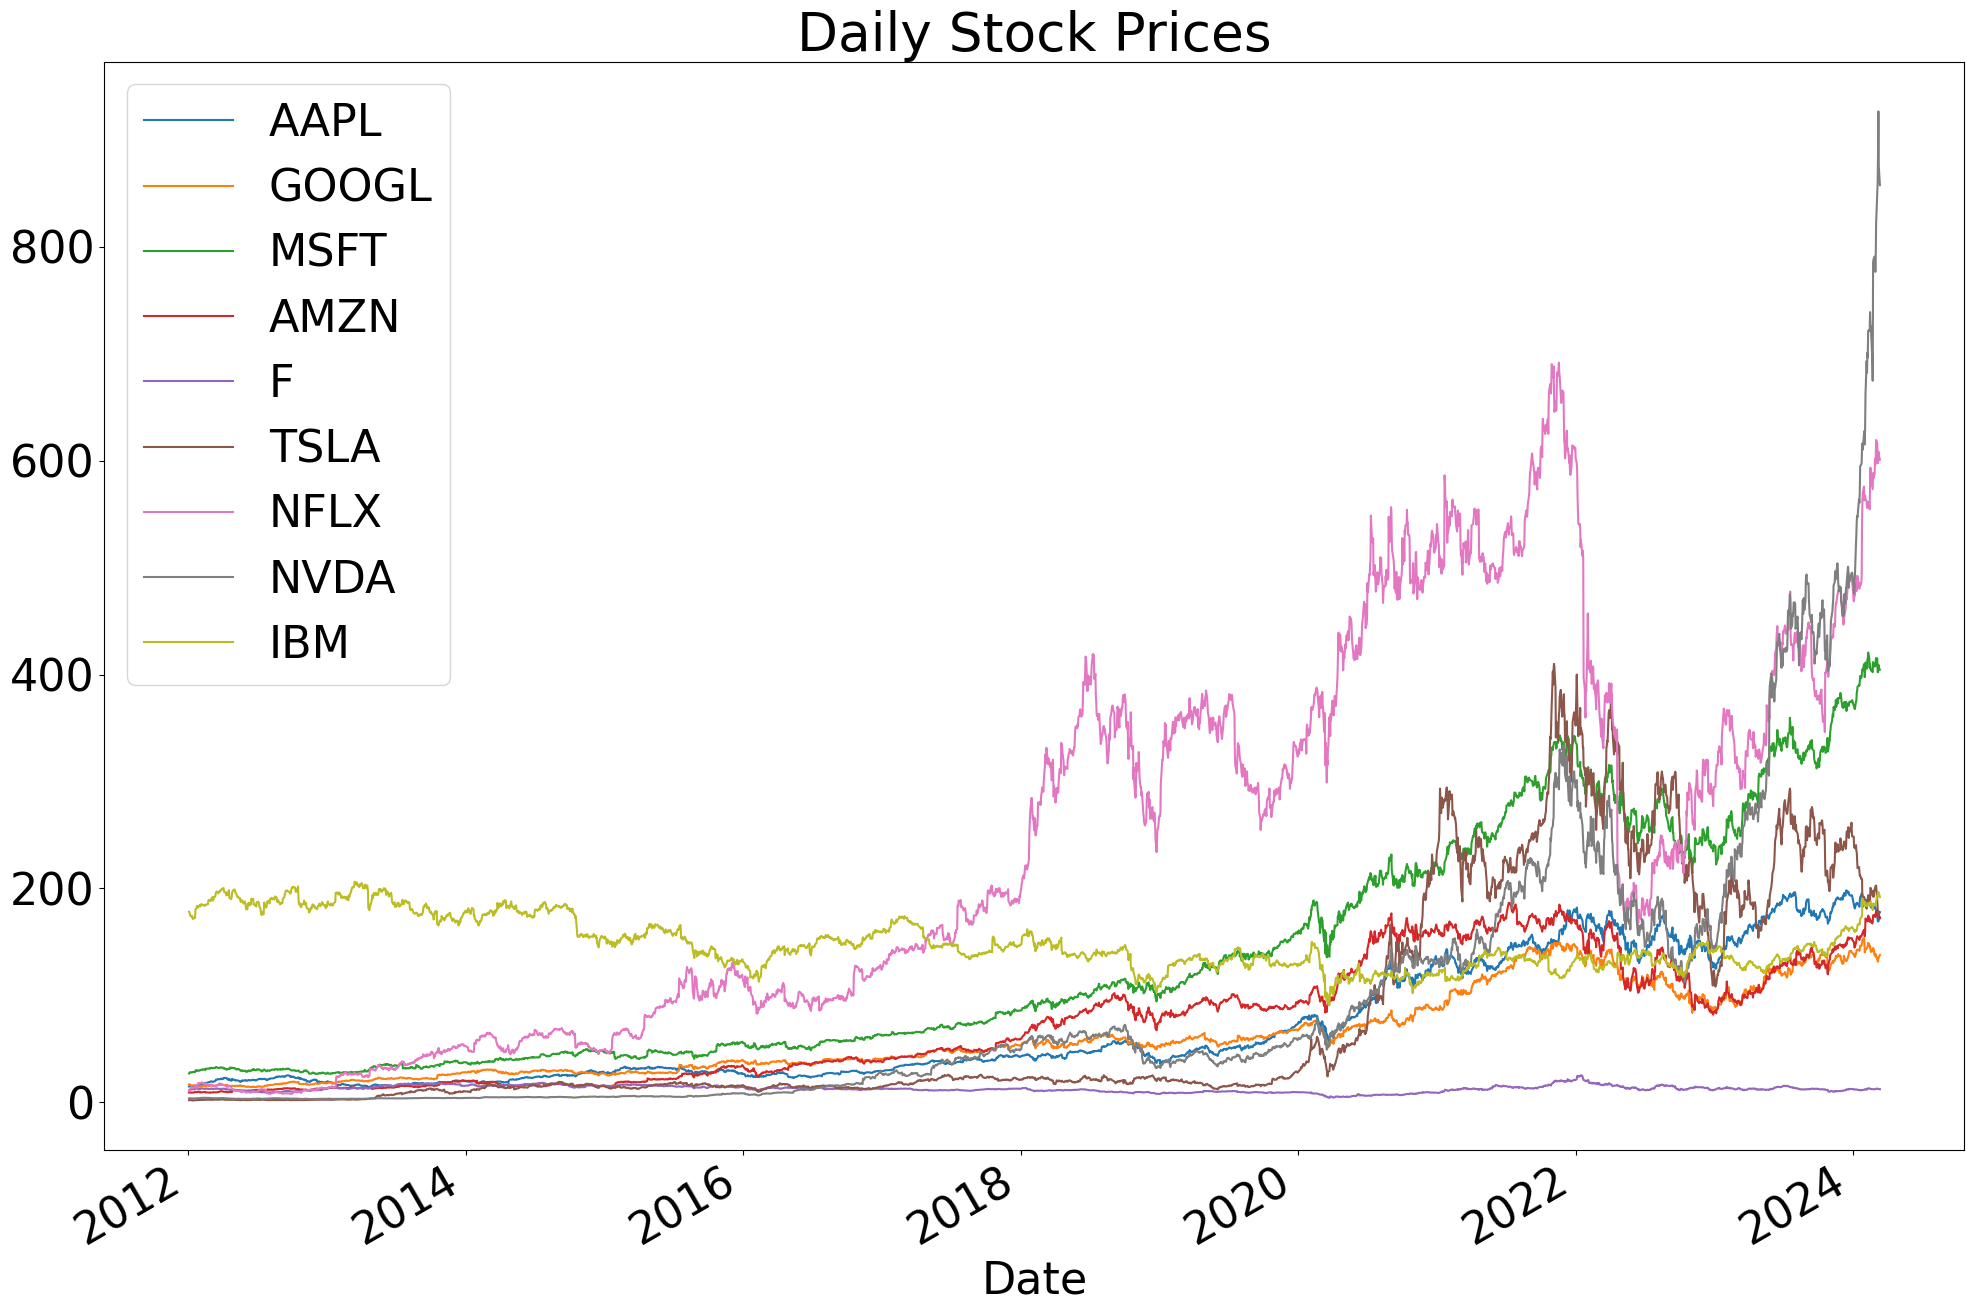

In [59]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 32})
fig, ax = plt.subplots(figsize = (24,16))
close_data.plot.line(legend=True, ax  =ax)
ax.set_title("Daily Stock Prices");

In [60]:
adj_close_data = pd.concat([val["Adj Close"] for val in data_dict.values()],
                      keys = data_dict.keys(),
                      axis = 1)
adj_close_data

,AAPL,GOOGL,MSFT,AMZN,F,TSLA,NFLX,NVDA,IBM
Date,,,,,,,,,
2012-01-03,12.433827,16.651901,21.238756,8.951500,6.406258,1.872000,10.320000,3.219731,111.905632
2012-01-04,12.500644,16.723724,21.738581,8.875500,6.504105,1.847333,11.492857,3.256423,111.449127
2012-01-05,12.639427,16.491741,21.960726,8.880500,6.671024,1.808000,11.328571,3.373379,110.920525
2012-01-06,12.771557,16.266768,22.301878,9.130500,6.740097,1.794000,12.327143,3.334394,109.647118
2012-01-09,12.751302,15.577077,22.008333,8.928000,6.791901,1.816667,14.025714,3.334394,109.076469
...,...,...,...,...,...,...,...,...,...
2024-03-05,170.119995,132.669998,402.649994,174.119995,12.580000,180.740005,598.500000,859.640015,191.949997
2024-03-06,169.119995,131.399994,402.089996,173.509995,12.380000,176.539993,597.690002,887.000000,196.160004
2024-03-07,169.000000,134.380005,409.140015,176.820007,12.410000,178.649994,608.510010,926.690002,196.539993


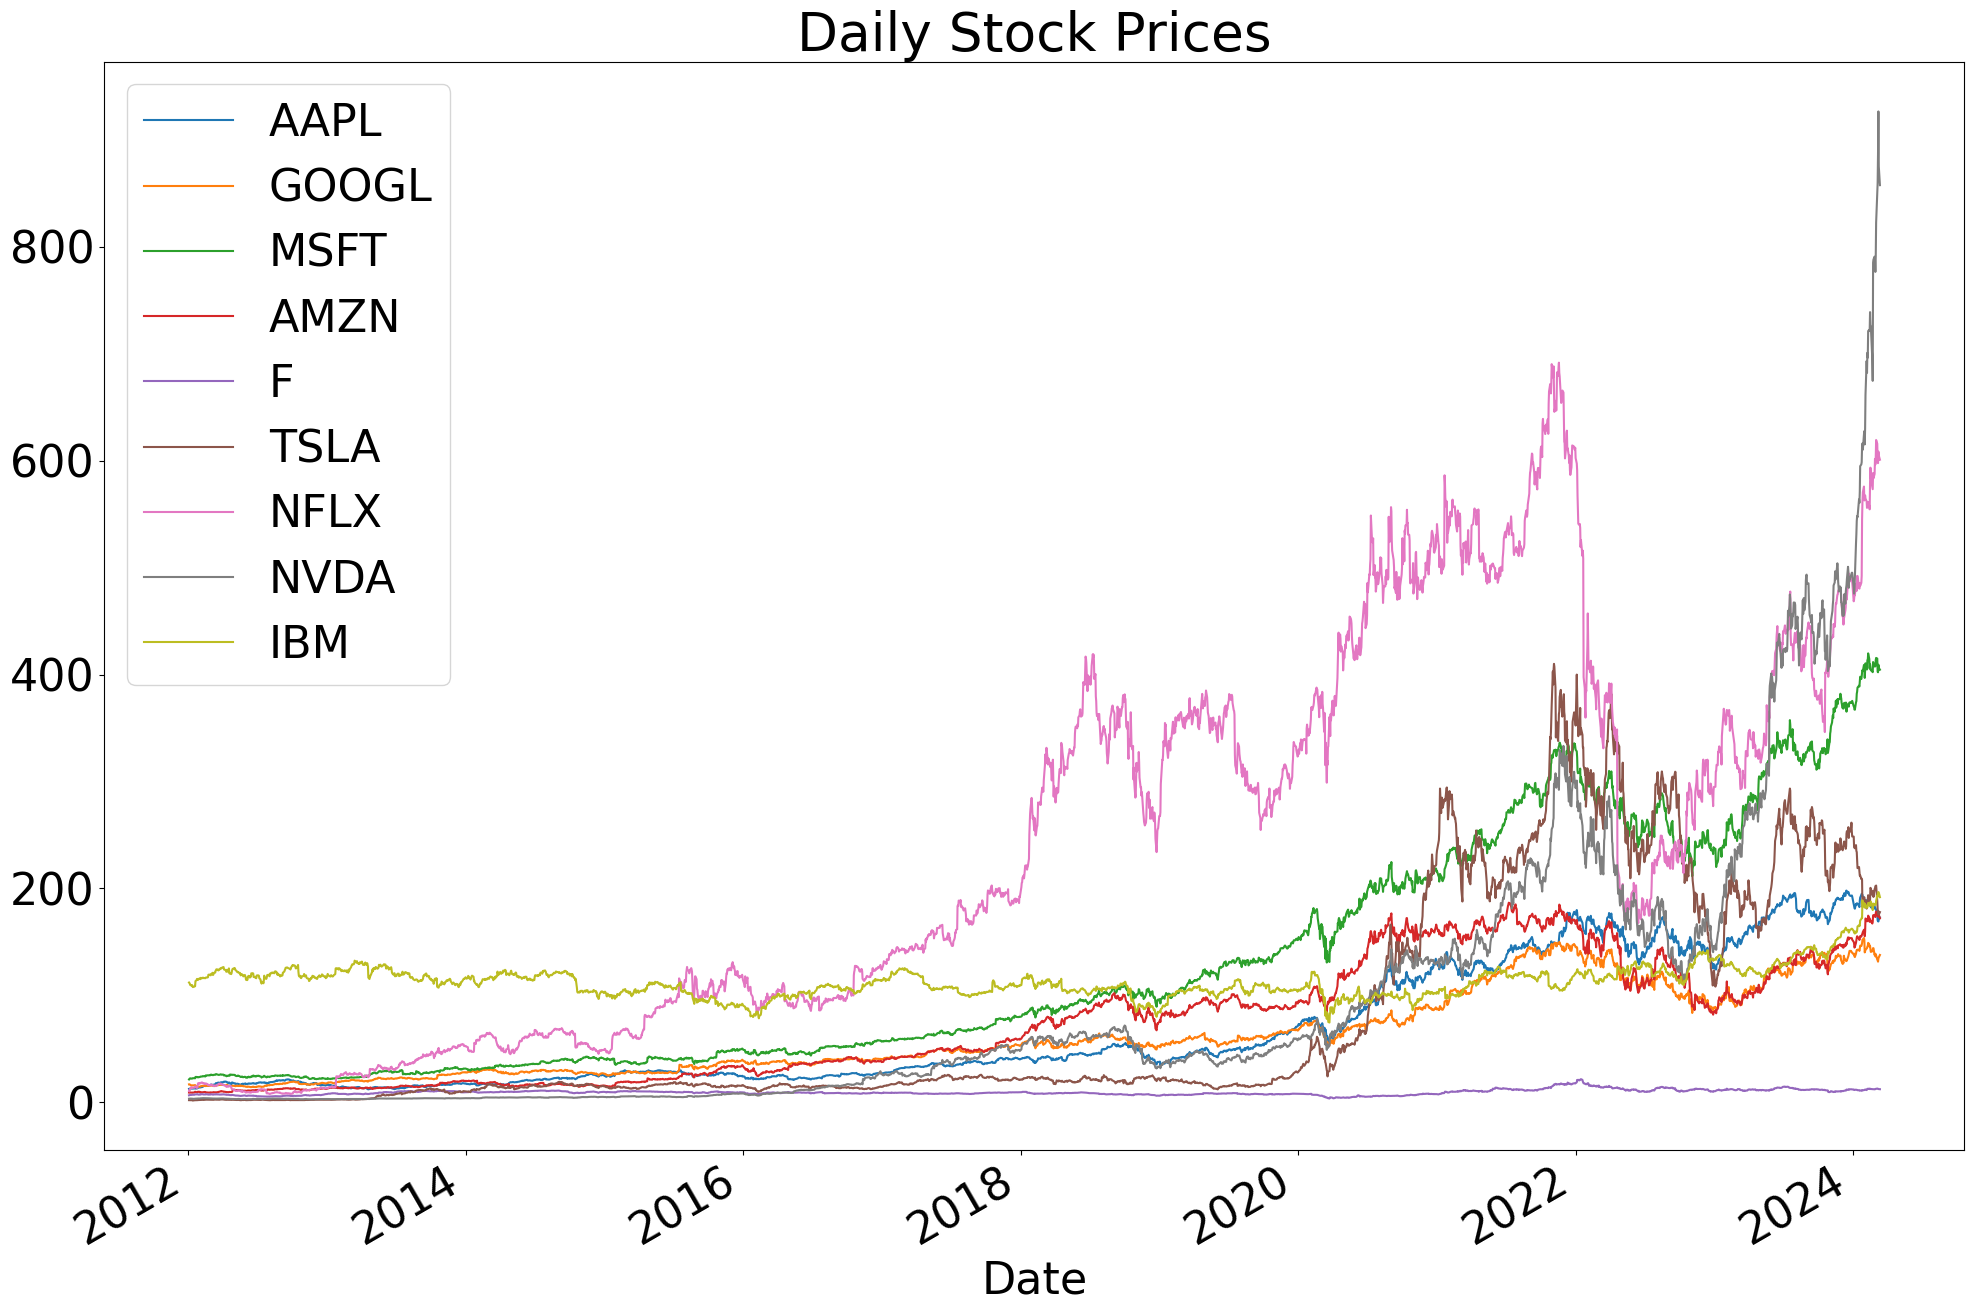

In [61]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 32})
fig, ax = plt.subplots(figsize = (24,16))
adj_close_data.plot.line(legend=True, ax  =ax)
ax.set_title("Daily Stock Prices");

## Logged Stock data

/var/folders/_9/vj33hj1n69v4tv98g5_2pxpm0000gn/T/ipykernel_26194/3306049912.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([int(y) for y in y_vals]);


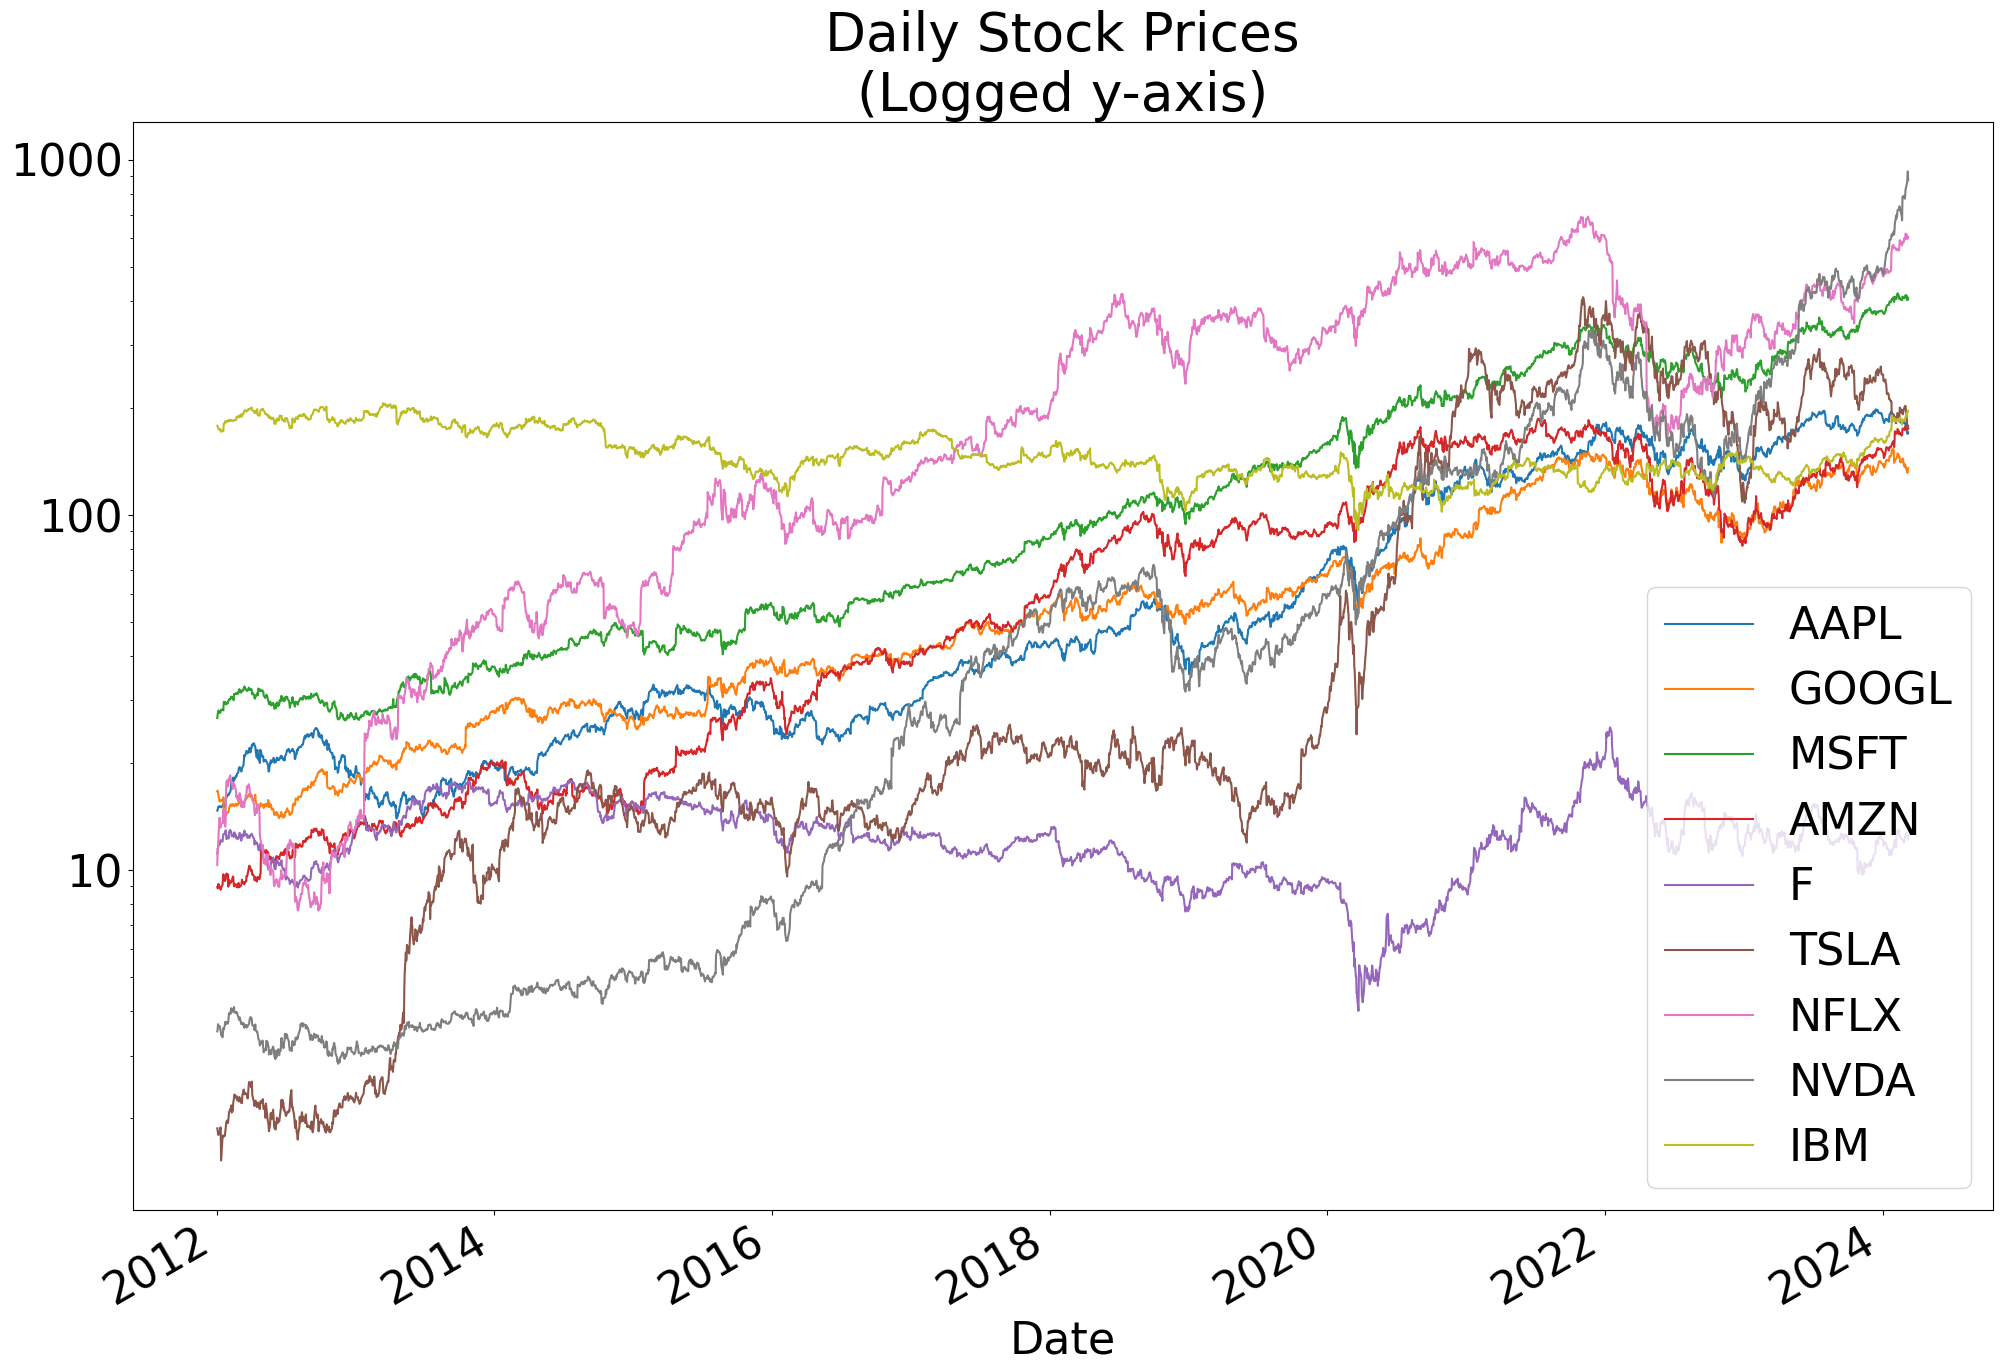

In [26]:
fig, ax = plt.subplots(figsize = (24,16))
close_data.plot.line(legend=True, ax  =ax)
ax.set_title("Daily Stock Prices\n(Logged y-axis)")
ax.set_yscale("log")
y_vals = ax.get_yticks()
ax.set_yticklabels([int(y) for y in y_vals]);

Upward Trends: Most of the tech companies, such as Apple, Google, Microsoft, Amazon, and Nvidia, have experienced significant upward trends in their stock prices over the displayed time period, indicating substantial growth. <br><br>
Volatility: Some stocks, like Tesla and Netflix, exhibit higher volatility with more pronounced peaks and valleys in their price trajectories, suggesting greater price fluctuations. <br><br>
Relative Performance: Companies like Apple, Microsoft, and Google have consistently maintained higher stock price levels compared to others in the group, reflecting their relative dominance and market capitalization. <br><br>
Industry Trends: The tech sector, represented by companies like Apple, Google, Microsoft, Amazon, and Nvidia, has generally outperformed more traditional companies like Ford and IBM, reflecting the broader shift towards technology-driven businesses.

/var/folders/_9/vj33hj1n69v4tv98g5_2pxpm0000gn/T/ipykernel_26194/1304148595.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  close_data.hist(bins = 50, alpha = .5, ax = ax);


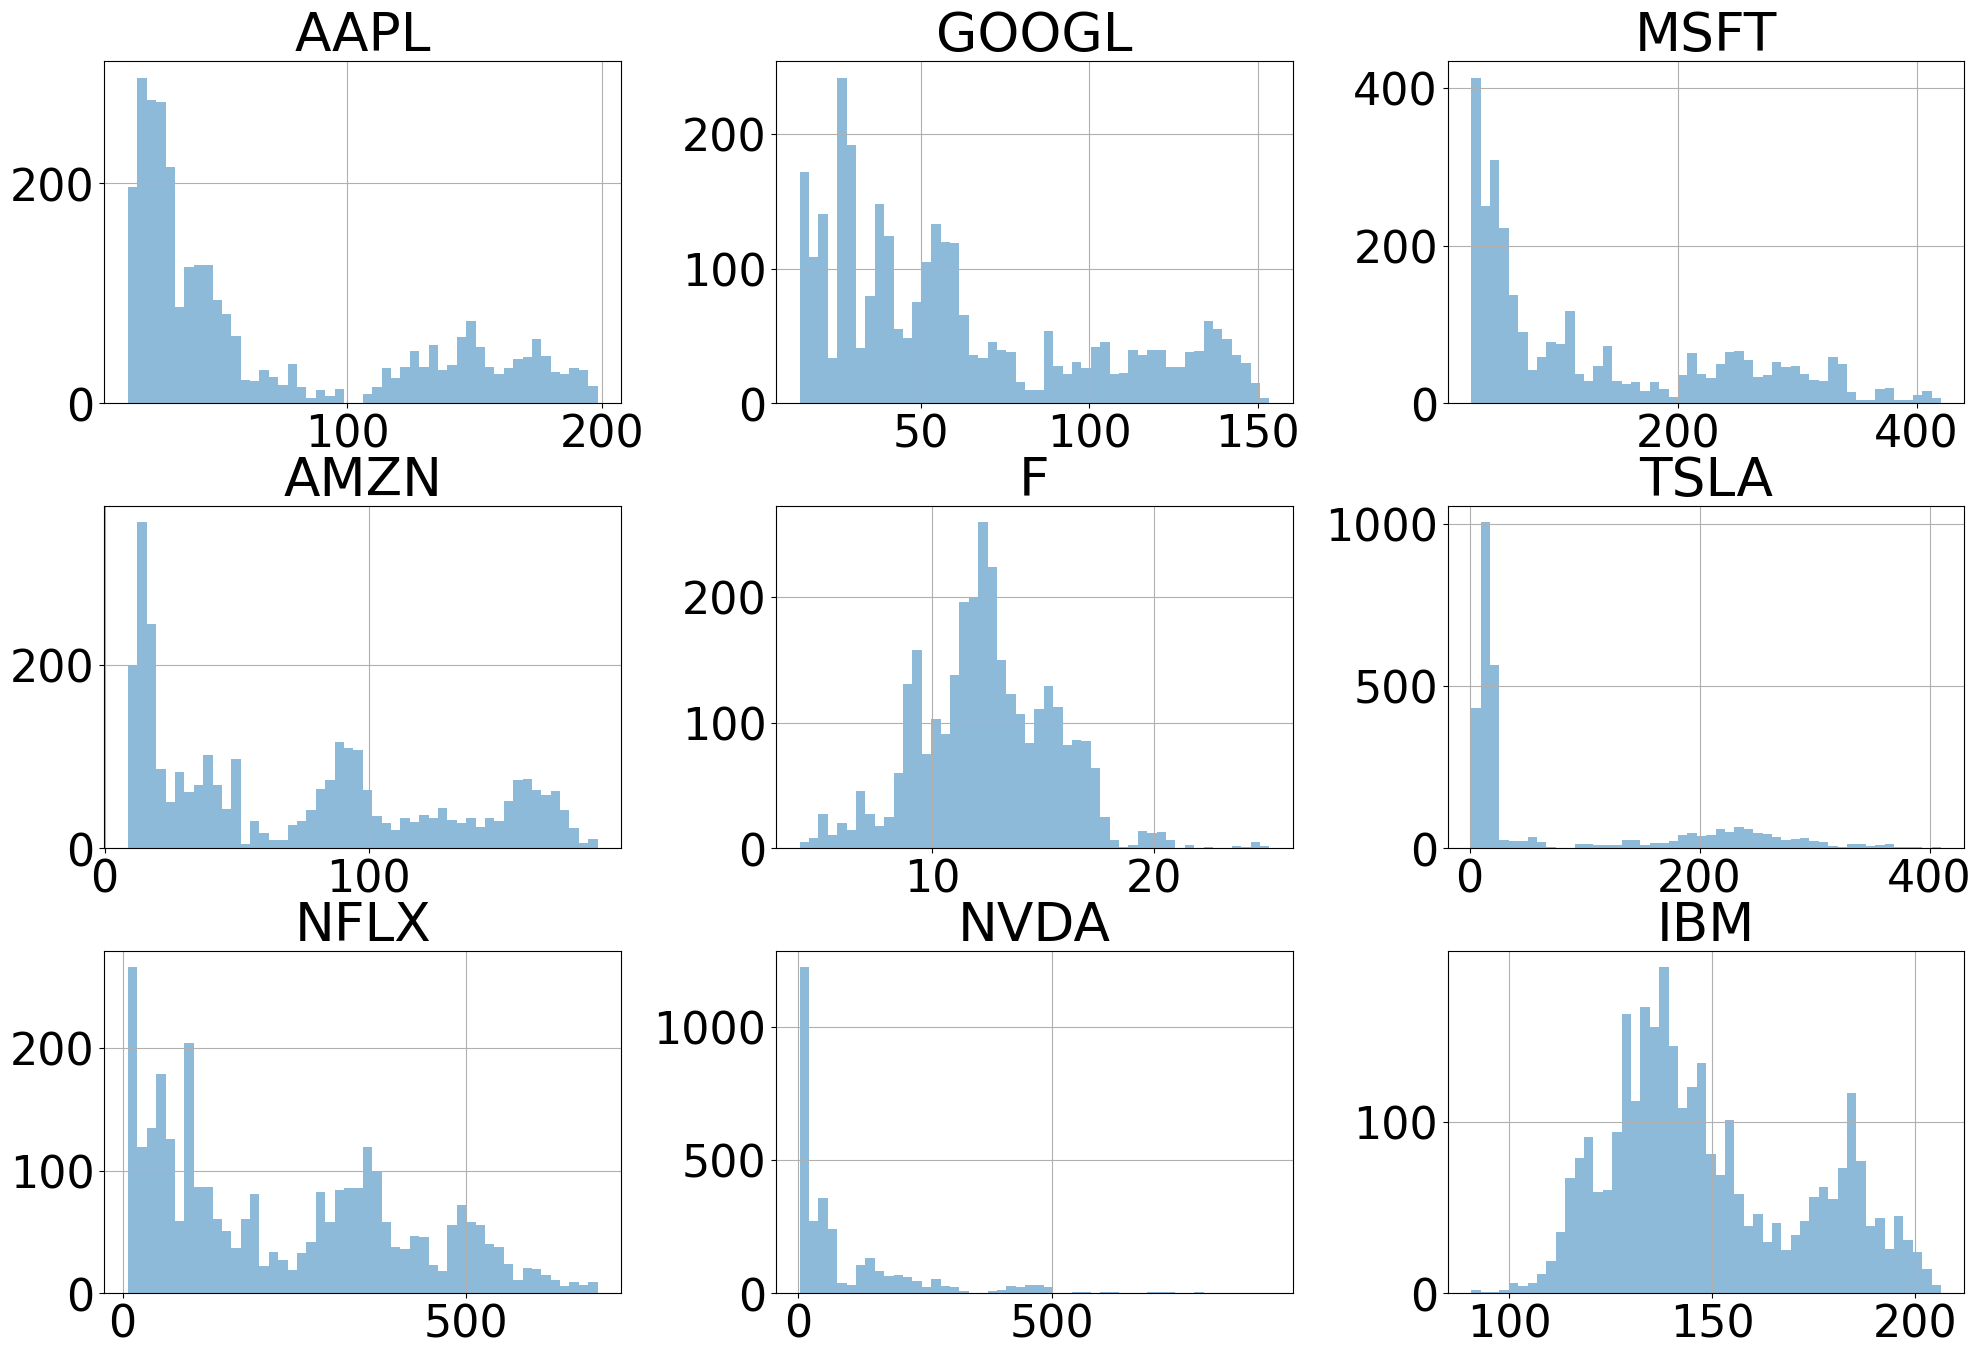

In [19]:
fig, ax = plt.subplots(figsize = (24,16))
close_data.hist(bins = 50, alpha = .5, ax = ax);


### Log of  the data to show proportion

/var/folders/_9/vj33hj1n69v4tv98g5_2pxpm0000gn/T/ipykernel_26194/3716848581.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  log_data.hist(bins = 50, alpha = .5, ax = ax);


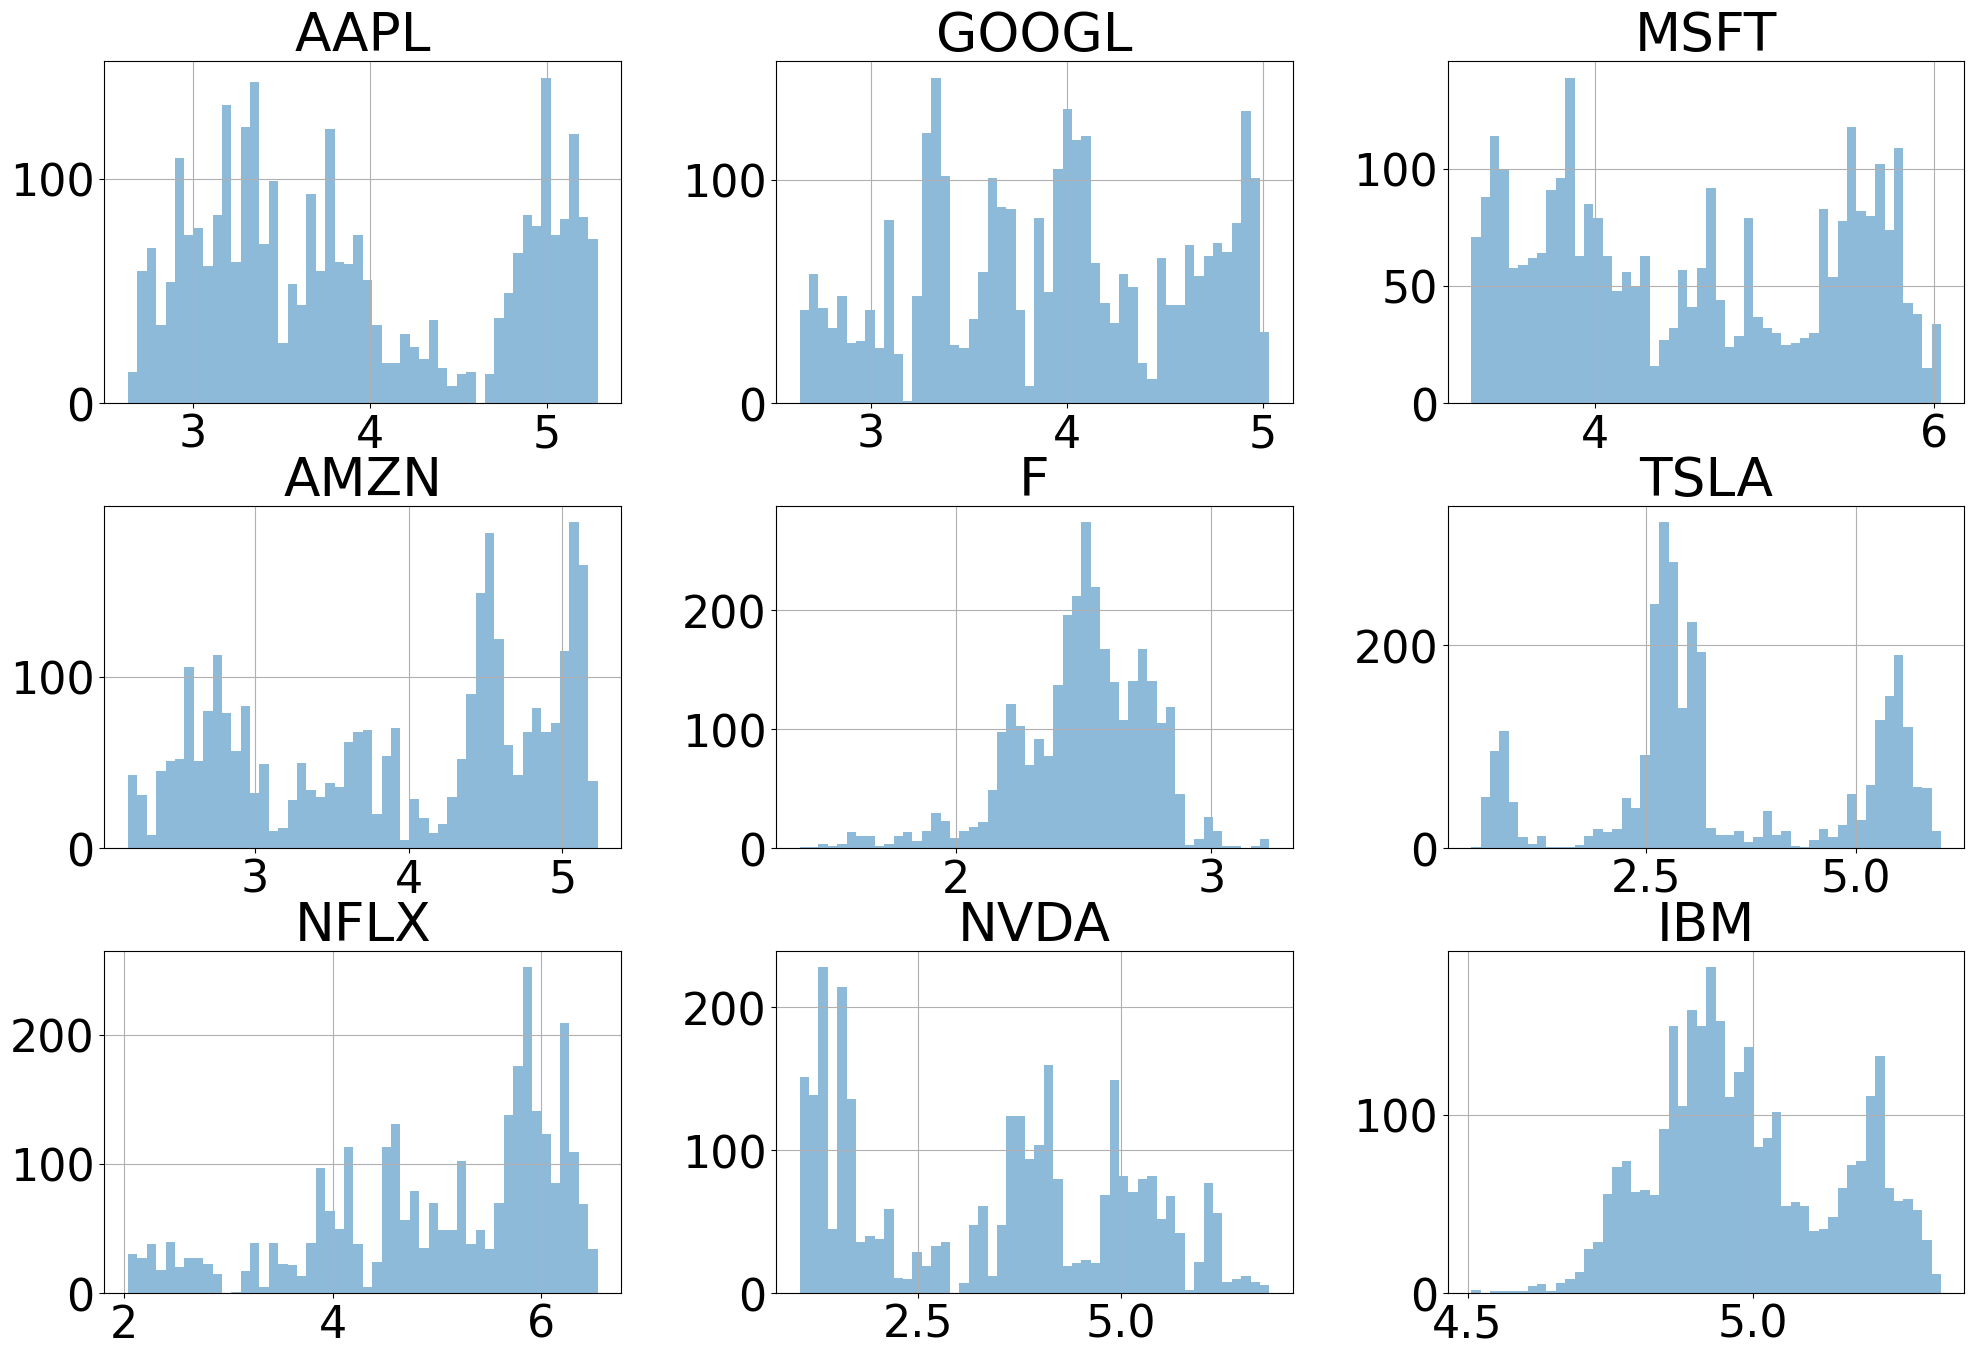

In [62]:
import numpy as np
log_data = np.log(close_data)
fig, ax = plt.subplots(figsize = (24, 16))
log_data.hist(bins = 50, alpha = .5, ax = ax);

In [12]:
def graph_yearly_distribution(data, key):
    years = sorted(list(set(data.index.year)))
    fig, ax = plt.subplots(figsize = (24,16))
    for year in years:
        color = "C" + str(year % 20)
        year = str(year)
        plot_data = data.loc[year, key]
        plot_data.hist(bins = 20,
                       color = color,
                      label = year,
                      alpha = .6,
                      ax = ax)
        ax.axvline(plot_data.mean(),
                  color = color,
                  linewidth = 5,
                  ls = "--")
    ax.set_title(key)
    ax.legend(bbox_to_anchor = (1,1.25), ncols = 5)


In [14]:
price_change_data = log_data.diff().mul(100).dropna()
price_change_data.to_csv("StockData.csv")

In [63]:
from stats import *
stats_df = gather_statistics(price_change_data, 
                            sample = False).round(2)
stats_df

,AAPL,GOOGL,MSFT,AMZN,F,TSLA,NFLX,NVDA,IBM
mean,0.08,0.07,0.09,0.10,0.00,0.15,0.13,0.18,0.00
median,0.07,0.08,0.07,0.10,0.00,0.13,0.04,0.19,0.03
variance,3.20,2.89,2.75,4.16,4.38,12.58,9.43,7.55,2.05
S.D.,1.79,1.70,1.66,2.04,2.09,3.55,3.07,2.75,1.43
skewness,-0.27,0.03,-0.20,0.14,0.04,-0.06,-0.41,0.29,-0.69
kurtosis,8.87,10.44,11.54,9.60,10.83,7.97,30.02,11.66,13.97


/var/folders/_9/vj33hj1n69v4tv98g5_2pxpm0000gn/T/ipykernel_26194/2058241939.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  price_change_data.hist(


array([[<Axes: title={'center': 'AAPL'}>,
        <Axes: title={'center': 'GOOGL'}>,
        <Axes: title={'center': 'MSFT'}>],
       [<Axes: title={'center': 'AMZN'}>, <Axes: title={'center': 'F'}>,
        <Axes: title={'center': 'TSLA'}>],
       [<Axes: title={'center': 'NFLX'}>,
        <Axes: title={'center': 'NVDA'}>,
        <Axes: title={'center': 'IBM'}>]], dtype=object)

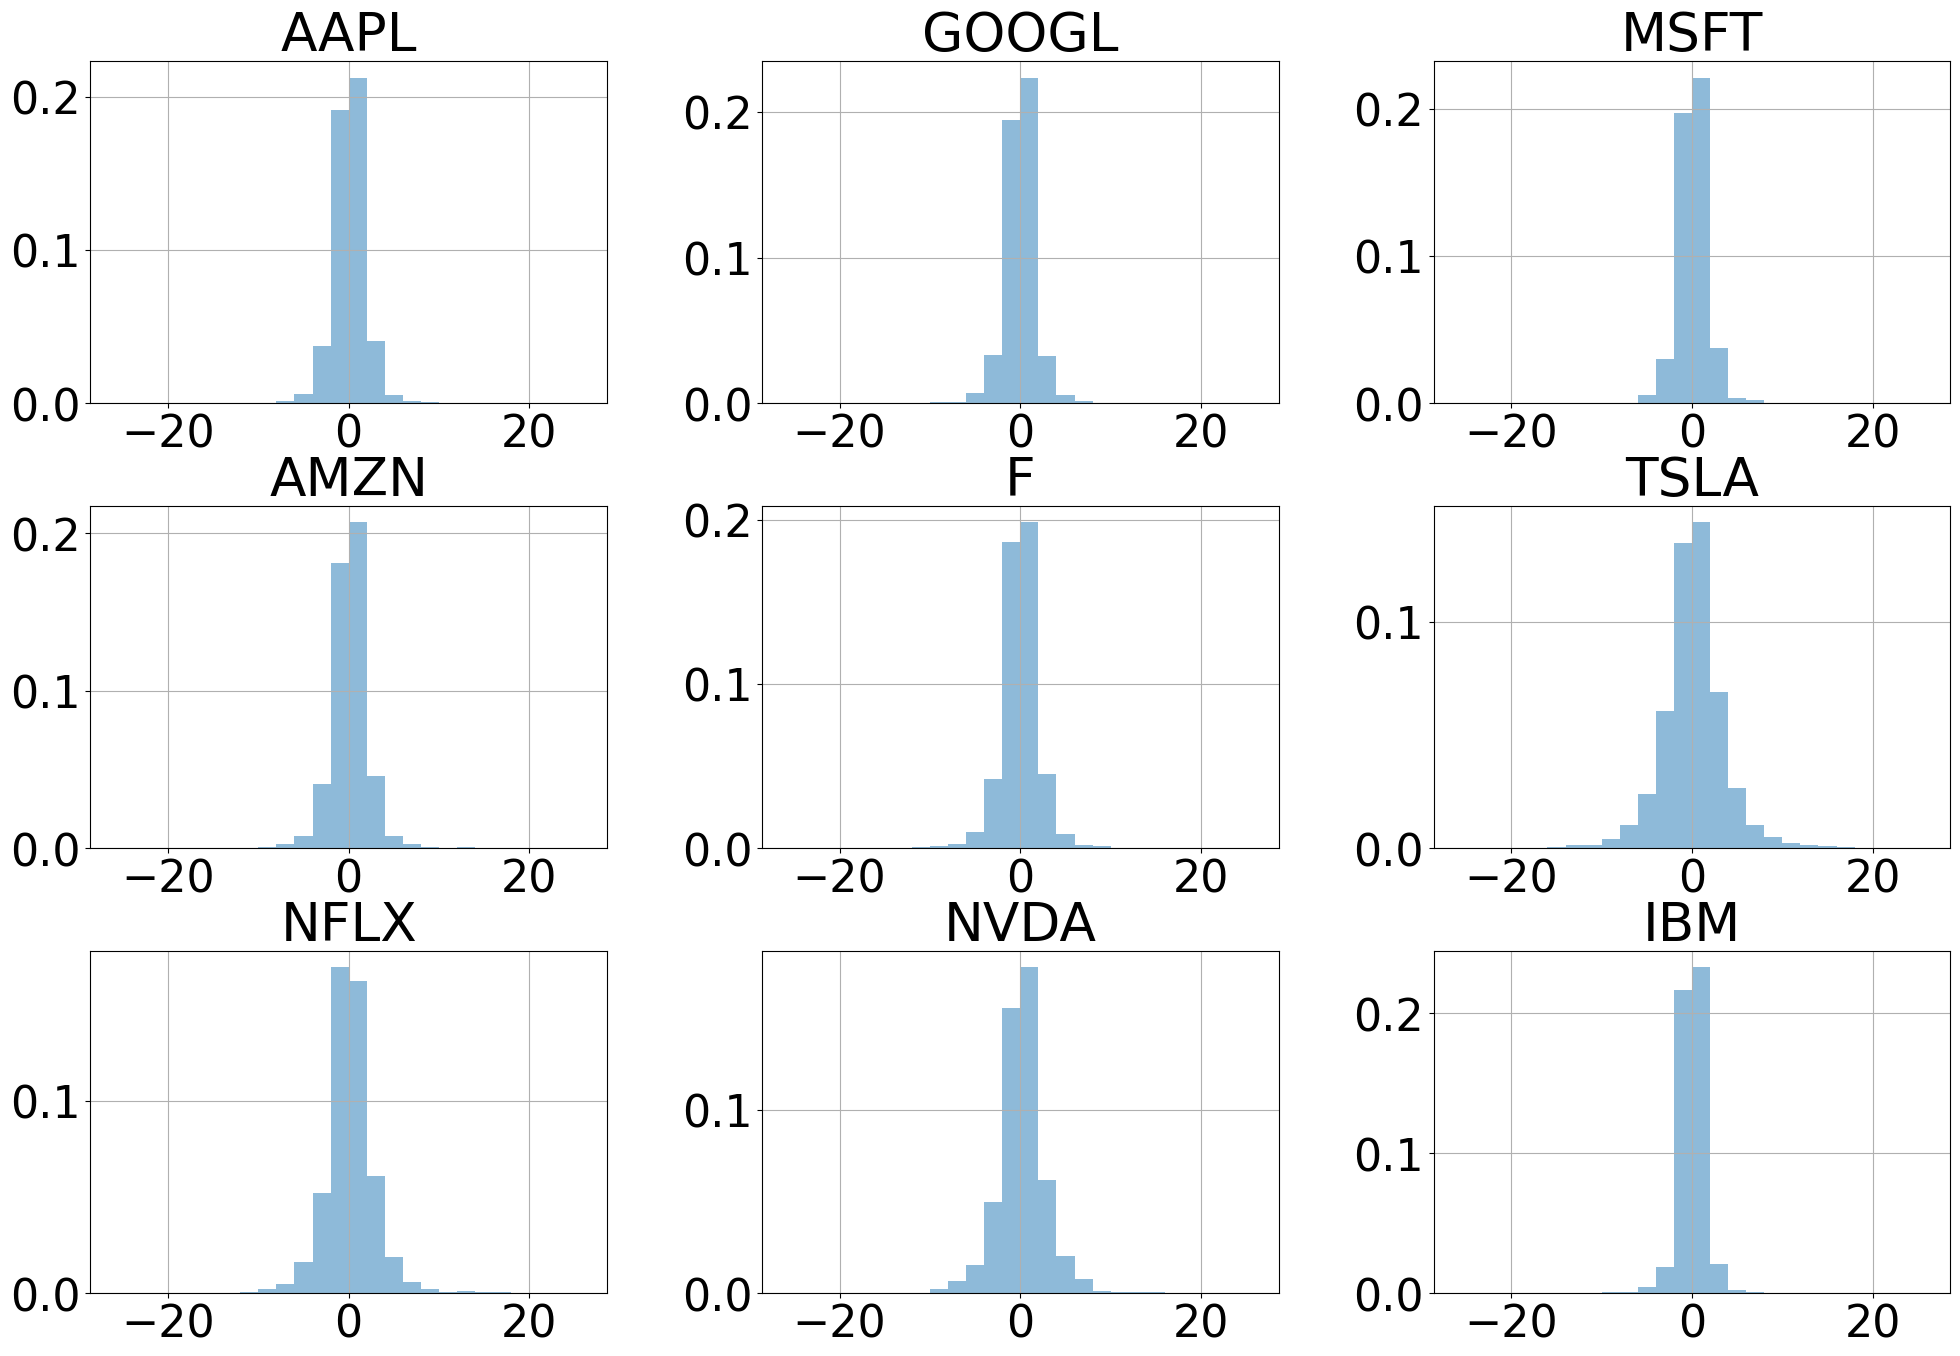

In [28]:
fig, ax = plt.subplots(figsize = (24,16))
price_change_data.hist(
                       alpha = .5,
                       ax = ax,
                      density = True,
                      bins = [i for i in range(-26, 27,2)])


AAPL: The histogram shows a somewhat multimodal distribution with several peaks, which may suggest that there are periods with distinct volatility characteristics. If there's a central peak close to zero, it implies that on many days, the stock has little to no percentage change.

GOOGL: This distribution also seems multimodal but with less extreme changes compared to AAPL. The presence of multiple peaks can indicate varying periods of volatility or trading behavior.

MSFT: The histogram shows a distribution with a slightly wider spread than AAPL and GOOGL, suggesting more days with significant price changes. This can be indicative of higher volatility.

AMZN: The distribution has a wider spread with multiple peaks, suggesting a varied volatility profile over different periods. There might be a few days with very large percentage changes, indicating potential outliers or extreme market events.

F: The histogram for Ford shows a more concentrated distribution, with the majority of changes being less extreme. This could imply less daily volatility compared to tech stocks.

TSLA: Tesla's histogram is wider, with a noticeable spread across the x-axis. This reflects Tesla's volatile nature, with frequent large daily percentage changes.

NFLX: Netflix has a distribution that shows high frequency at the center but also has fat tails, which indicates a greater likelihood of extreme changes. This can be a sign of high investment risk and potential for both high losses and high gains.

NVDA: Nvidia's distribution, while spread out, appears to be less extreme than NFLX's. However, the presence of several peaks at different levels suggests periods of varying volatility.

IBM: IBM's histogram appears to have a more bell-shaped distribution compared to the others, which may indicate a more stable, less volatile stock with fewer extreme daily price changes.

[<Axes: title={'center': 'AAPL'}> <Axes: title={'center': 'GOOGL'}>
 <Axes: title={'center': 'MSFT'}>]
[<Axes: title={'center': 'AMZN'}> <Axes: title={'center': 'F'}>
 <Axes: title={'center': 'TSLA'}>]
[<Axes: title={'center': 'NFLX'}> <Axes: title={'center': 'NVDA'}>
 <Axes: title={'center': 'IBM'}>]


/var/folders/_9/vj33hj1n69v4tv98g5_2pxpm0000gn/T/ipykernel_26194/1994307926.py:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  a.set_xticklabels([str(int(x)) + "%" for x in x_vals])
/var/folders/_9/vj33hj1n69v4tv98g5_2pxpm0000gn/T/ipykernel_26194/1994307926.py:44: UserWarning: FixedFormatter should only be used together with FixedLocator
  a.set_yticklabels([str(int(y * 100)) + "%" for y in y_vals])
/var/folders/_9/vj33hj1n69v4tv98g5_2pxpm0000gn/T/ipykernel_26194/1994307926.py:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  a.set_xticklabels([str(int(x)) + "%" for x in x_vals])
/var/folders/_9/vj33hj1n69v4tv98g5_2pxpm0000gn/T/ipykernel_26194/1994307926.py:44: UserWarning: FixedFormatter should only be used together with FixedLocator
  a.set_yticklabels([str(int(y * 100)) + "%" for y in y_vals])
/var/folders/_9/vj33hj1n69v4tv98g5_2pxpm0000gn/T/ipykernel_26194/1994307926.py:43: UserWarning: FixedFormatter should only be us

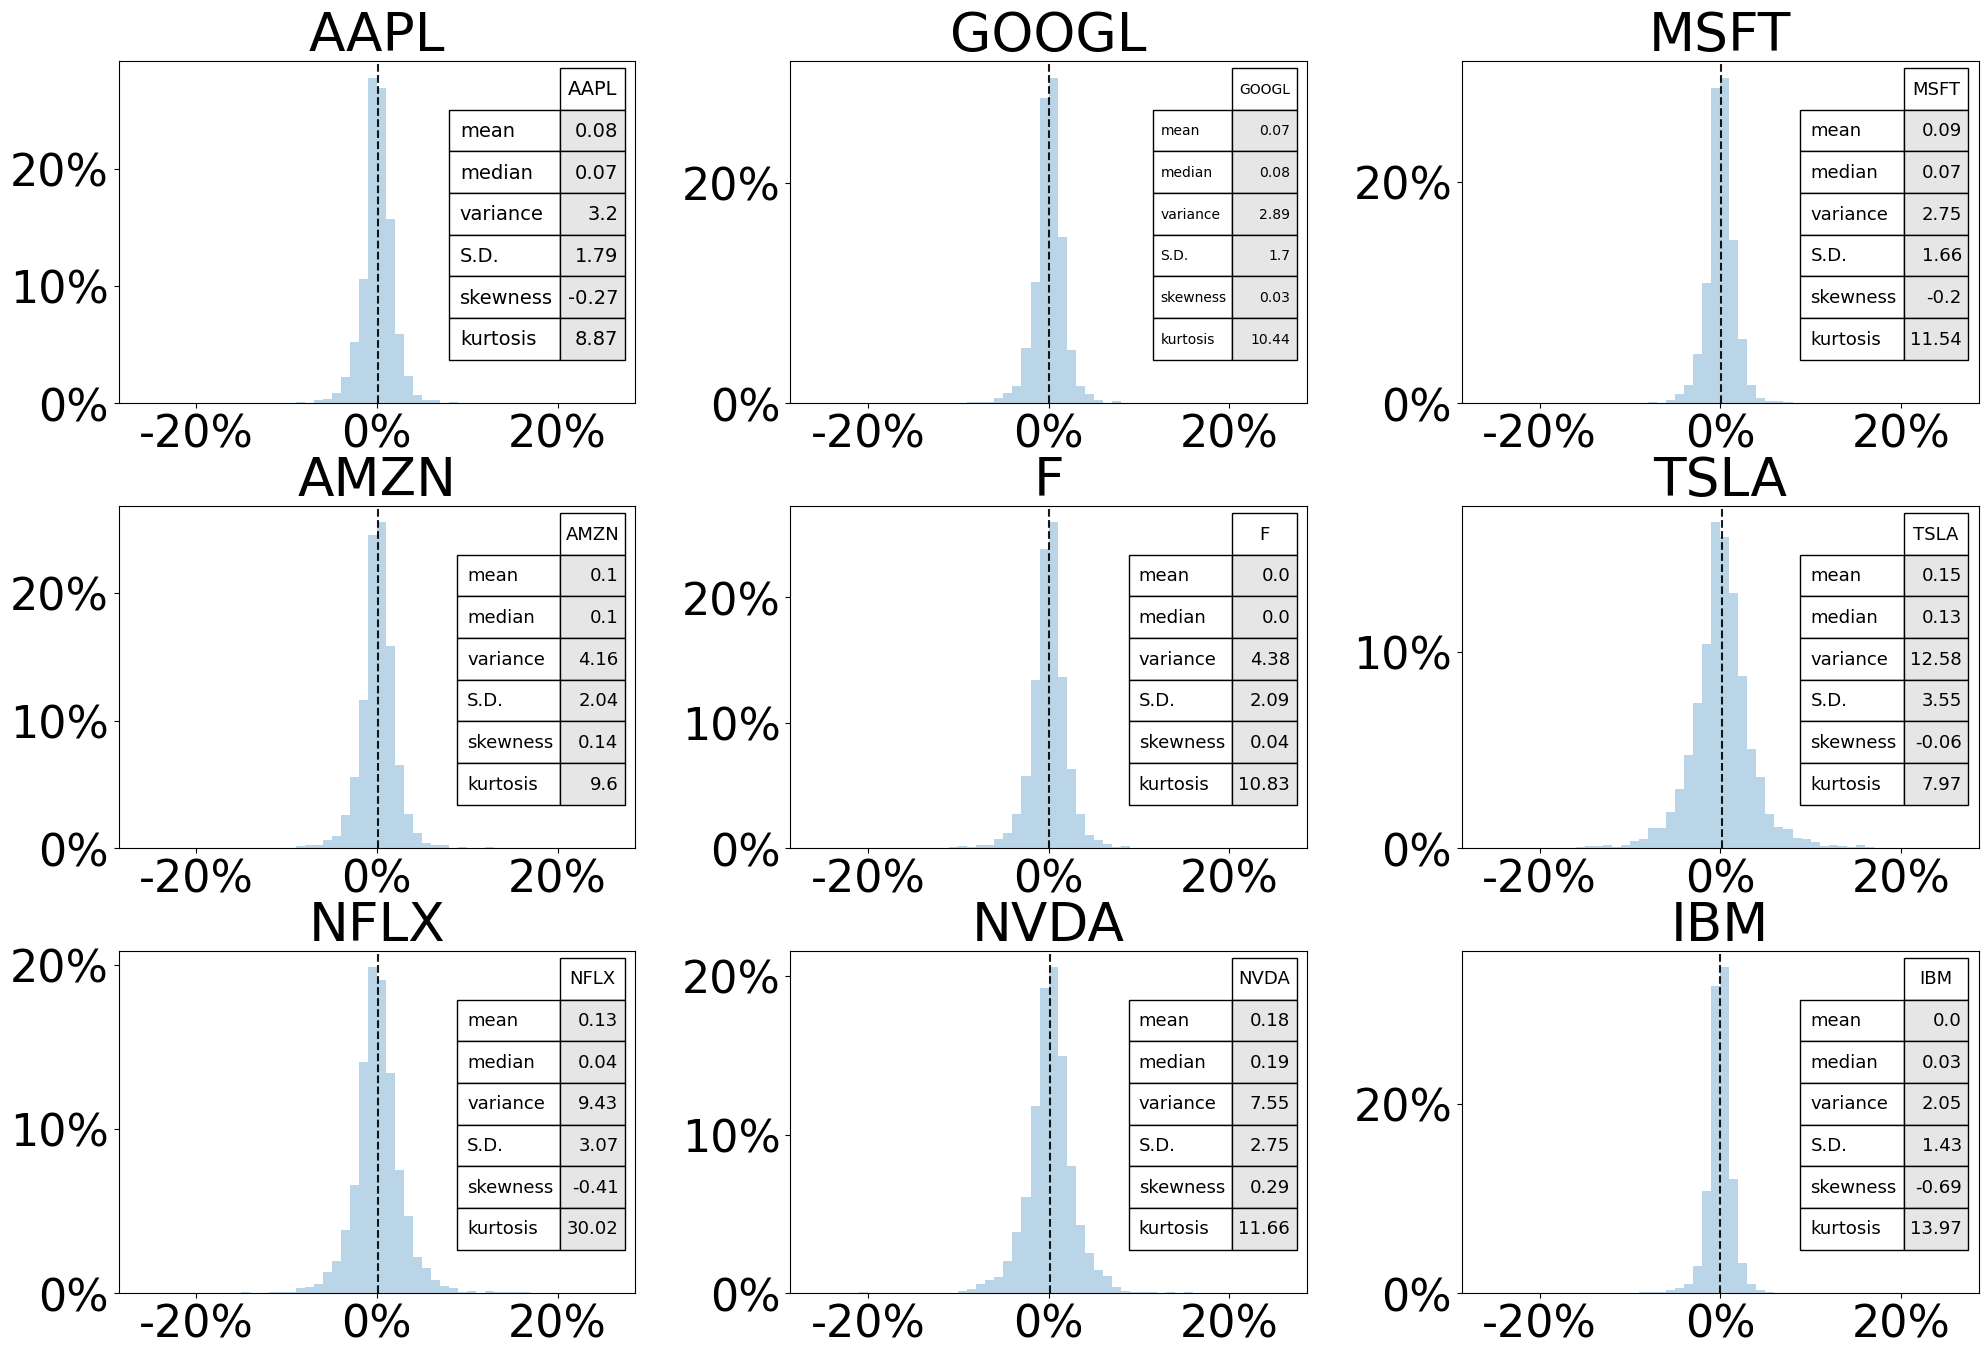

In [45]:
from pandas.plotting import table

cellColours = [[(.9, .9, .9)] for _ in range(len(hist_data))]

fig, ax = plt.subplots(3, 3, figsize = (24,16))
price_change_data.hist(bins = [i for i in range(-26, 27,1)], 
#                        bins = 50,
                       alpha = .3, 
                       label = price_change_data.keys(), 
                       ax = ax, 
                       density = True)

for i in range(len(ax)):
    print(ax[i])
    for j in range(len(ax[i])):
        # select hist plot for each stock
        a = ax[i][j]
        # identify stock

        stock = a.title._text
        
        # save summary statistics data
        hist_data = stats_df[stock] 
        # plot summary statistics within the histogram plot
        stats =table(a, hist_data, 
                     colWidths=[.1], 
                     # make 7 grey cells where the values are output
                        cellColours= cellColours, 
                     loc = "upper right")
        stats.scale(1.25,2.5)
#         stats.auto_set_font_size(False)
#         stats.set_fontsize(20)
        # use the mean value of the log diff of stock prices for a 
        # vertical line
        a.axvline(x = hist_data.loc["mean"], ls = "--", color = "k", alpha= .9)
        # add % sign to values 
        x_vals = a.get_xticks()
        y_vals = a.get_yticks()
        
        a.set_xticklabels([str(int(x)) + "%" for x in x_vals])
        a.set_yticklabels([str(int(y * 100)) + "%" for y in y_vals]) 
        a.grid(False);
        

### AAPL (Apple Inc.)
- **Mean vs. Median**: The mean is slightly higher than the median, suggesting a small right skew in the data.
- **Skewness**: A negative value implies a left skew, but since it's close to zero, the distribution is almost symmetrical.
- **Kurtosis**: The high kurtosis indicates a leptokurtic distribution with more frequent extreme deviations from the mean than a normal distribution would exhibit.

### GOOGL (Alphabet Inc.)
- **Skewness**: Near zero, suggesting that the distribution of returns is mostly symmetrical around the mean.
- **Kurtosis**: Very high kurtosis indicates a high probability of extreme returns compared to a normal distribution, which is reflected in the tall peak of the histogram.

### MSFT (Microsoft Corporation)
- **Mean vs. Median**: Similar to AAPL, indicating that larger gains are slightly more frequent than larger losses.
- **Kurtosis**: Also high, indicating that investors can expect extreme movements more often than a standard bell curve would suggest.

### AMZN (Amazon.com Inc.)
- **Mean vs. Median**: Close values suggest a symmetric distribution around the center.
- **Kurtosis**: High, indicating potential for extreme price changes.

### F (Ford Motor Company)
- **Mean vs. Median**: Both are zero, indicating a balanced distribution with equal tendencies for positive and negative changes.
- **Skewness and Kurtosis**: Slight positive skewness and high kurtosis, indicating occasional extreme returns.

### TSLA (Tesla, Inc.)
- **Mean vs. Median**: The mean is significantly higher than the median, suggesting notable right skewness; however, the skewness value is close to zero, indicating a nearly symmetrical distribution.
- **Variance and Standard Deviation**: Both are high, reflecting Tesla's volatility.

### NFLX (Netflix, Inc.)
- **Mean vs. Median**: The mean is higher than the median, indicating a distribution with fatter tails on the right.
- **Kurtosis**: Extremely high kurtosis suggests very frequent extreme deviations from the mean, which is evident from the tall, narrow peak in the histogram.

### NVDA (NVIDIA Corporation)
- **Skewness**: Slight right skewness.
- **Kurtosis**: High kurtosis indicates that extreme values are more common than in a normal distribution.

### IBM (International Business Machines Corporation)
- **Skewness**: The negative skew indicates that the distribution has a longer left tail, with more frequent negative returns than positive ones.
- **Kurtosis**: Very high kurtosis indicates the presence of outliers and the potential for extreme price changes.

### Overall Analysis
All histograms display the probability density of the logarithmic price changes. The vertical dashed lines represent the mean of each distribution, providing a reference point for the central tendency. The summary statistics tables give additional insight:

- Stocks with higher standard deviations and variances (like TSLA and NFLX) indicate higher volatility.
- Negative skewness values (like AAPL) suggest that there are more frequent but smaller positive returns and fewer but larger negative returns.
- High kurtosis across most stocks suggests that significant price moves are more common than would be expected in a normal distribution, which can be crucial information for risk management.

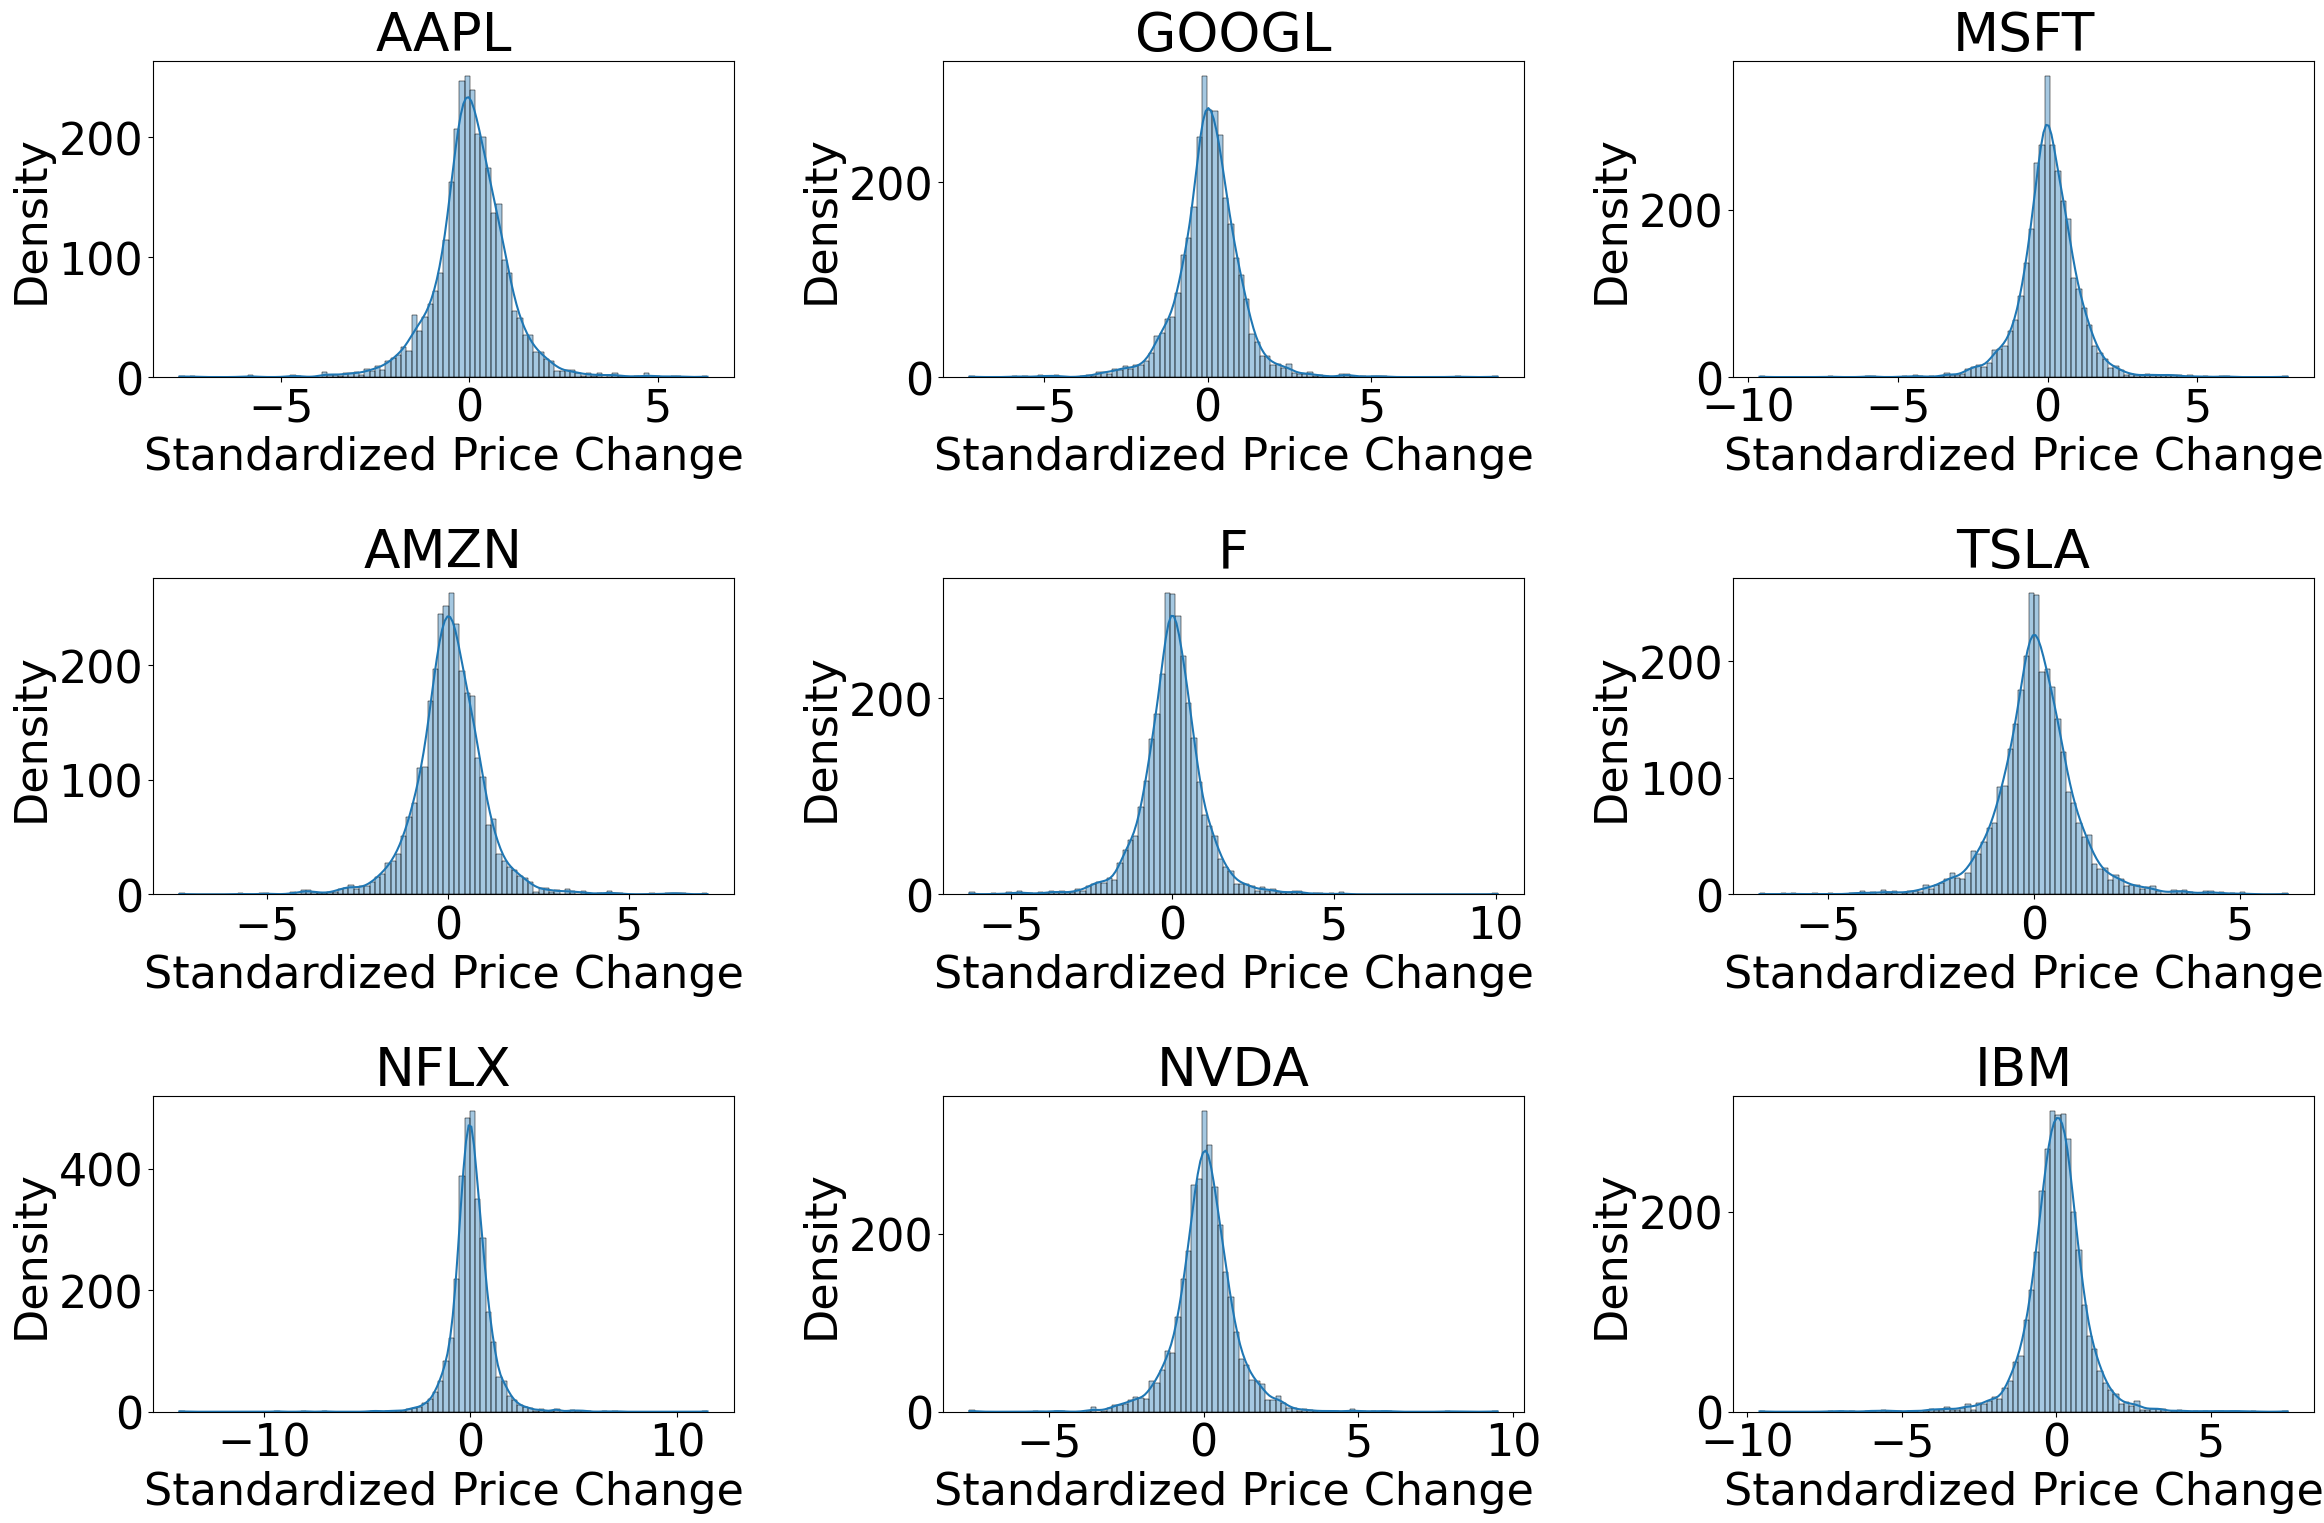

In [68]:
# Standardize Disributions
import seaborn as sns
plot_data = price_change_data.div(
    price_change_data.std())[stocks]
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(24, 16)) 
axes = axes.flatten()  

for i, stock in enumerate(stocks):
    sns.histplot(plot_data[stock], bins=100, kde=True, ax=axes[i], alpha=0.4)
    axes[i].set_title(stock)
    axes[i].set_xlabel('Standardized Price Change')
    axes[i].set_ylabel('Density')

fig.tight_layout()

1. **AAPL (Apple Inc.)**: The histogram is tall and narrow, indicating a leptokurtic distribution where outcomes are clustered around the mean more tightly than a normal distribution, with relatively infrequent extreme deviations.

2. **GOOGL (Alphabet Inc.)**: This histogram is similar to AAPL's, with a high peak and steep sides, suggesting a high frequency of price changes near the mean and low frequency of extreme changes.

3. **MSFT (Microsoft Corporation)**: The histogram is slightly wider than AAPL's and GOOGL's, indicating a somewhat lower level of kurtosis but still within a range that suggests a leptokurtic distribution.

4. **AMZN (Amazon.com Inc.)**: The histogram shows a high peak around the mean with steep drop-offs on both sides, indicative of a distribution with most of the data clustered around the mean.

5. **F (Ford Motor Company)**: The histogram is narrower and the peak is not as pronounced as in some other stocks, which could indicate a more mesokurtic distribution — closer to the normal distribution in terms of kurtosis.

6. **TSLA (Tesla, Inc.)**: Tesla's histogram has a narrower peak and shows a bit more spread in the data, which might indicate higher volatility in price changes relative to the others.

7. **NFLX (Netflix, Inc.)**: Netflix's histogram shows a significantly taller and sharper peak compared to the others, which suggests a very leptokurtic distribution, meaning more of the data is concentrated around the mean with occasional extreme values.

8. **NVDA (NVIDIA Corporation)**: Similar to Tesla, NVIDIA's histogram shows a relatively higher frequency of data points around the mean with a somewhat leptokurtic distribution.

9. **IBM (International Business Machines Corporation)**: The histogram for IBM is similar to that of AAPL and GOOGL, showing a leptokurtic distribution, with most of the standardized price changes occurring close to the mean.

### Summary of Analysis:
- **Leptokurtic Distributions**: Most of the histograms exhibit leptokurtosis, with data points clustered around the mean and thin tails, suggesting that the price changes are often close to the average on a standardized scale.
- **Volatility**: The width of the histograms indicates the relative volatility of the stocks; narrower histograms suggest less variability in standardized price changes, while wider ones suggest greater variability.
- **Density**: The height of the peak in each histogram is indicative of how often the price changes occur near the mean value; higher peaks mean more frequent occurrences near the mean.

### Conclusions:
- Stocks like AAPL, GOOGL, and IBM show high peaks and less variability in standardized price changes, indicating stable behavior with less extreme movements.
- Stocks like TSLA and NFLX have slightly wider distributions, suggesting more volatile behavior.
- The leptokurtic nature of the distributions indicates that all these stocks have a tendency to experience extreme price changes more often than would be expected in a normal distribution, which is typical in financial time series data due to the occurrence of large market moves, often driven by external events or announcements. 